# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 2__

__Nombres de los estudiantes: Iñigo Sanz y Berta de Pablo__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

In [41]:
RANDOM_STATE=333

In [42]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [43]:
df = pd.read_csv ('airbnb.csv')
df

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


In [44]:
df.describe()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,3.372316,52.365312,4.889033,2.885051,17.797440,2.998582,0.155954,0.777170,0.218562,0.004267,130.050273
std,1.298492,0.343442,0.839649,0.940643,11.203593,0.015765,0.035010,7.252271,34.766613,1.610995,0.362824,0.416159,0.413285,0.065187,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,0.000000,0.000000,0.000000,0.000000,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,52.355582,4.864839,2.000000,2.000000,1.948924,0.000000,1.000000,0.000000,0.000000,89.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,52.364960,4.886370,2.000000,7.000000,2.841338,0.000000,1.000000,0.000000,0.000000,115.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,52.374805,4.907953,3.000000,18.000000,3.577086,0.000000,1.000000,0.000000,0.000000,150.000000
max,17.000000,8.000000,10.000000,16.000000,106.000000,52.426224,5.027689,523.000000,496.000000,11.842162,1.000000,1.000000,1.000000,1.000000,440.000000


En el documento observamos en total 14.998 alojamientos de airbnb y 15 variables en total.
Observamos las siguientes variables,

__accomodates__: número de personas que pueden alojarse en el apartamento

__bathrooms__: número de baños

__bedrooms__: número de habitaciones

__guests_included__: número de personas con las que compartiremos el apartamento (que no forman parte de nuestra reserva)

__host_listings_count__: número de apartamentos aparte que tiene el propietario del airbnb

__latitude__: latitud del apartamento para saber donde se localiza

__longitude__: longitud del apartamento para saber donde se localiza

__minimum_nights__: minimo de noches que se puede reservar el apartamento

__number_of_reviews__: número de opiniones

__distance_centre__: distancia al centro de la ciudad

__instant_bookable__: valor booleano para saber si se puede reservar al instante

__entire_home__: si es el apartamento entero

__private_room__: si es una habitación privada

__shared_room__: si es una habitacion compartida

__price__: precio de la reserva

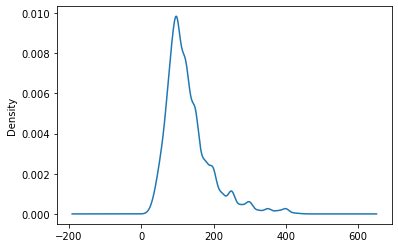

In [45]:
df['price'].plot.density()

In [46]:
df['price'].describe()

count    14998.000000
mean       130.050273
std         63.820328
min         19.000000
25%         89.000000
50%        115.000000
75%        150.000000
max        440.000000
Name: price, dtype: float64

Distribución de los precios:

Los precios están entre 19 y 440 euros. Sin embargo podemos observar que la mayoria de estos se sitúan entre 90 y 150, como vemos en el gráfico y en los tres cuartiles mostrados justo arriba. Unos pocos precios van más allá de 200, con un par llegando a valores muy altos como 300/400 euros.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

Coeficientes de correlación de Pearson:

In [47]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
df2 = df.corr(method='pearson')['price'] # obtenemos los coeficientes solo relacionados con el precio

In [48]:
df2

accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
instant_bookable      -0.004410
entire_home            0.361313
private_room          -0.357184
shared_room           -0.042109
price                  1.000000
Name: price, dtype: float64

In [49]:
print("Borramos:")
df_precio = df
for item in df2.items():
    if (item[1] < 0.2 and item[1] > -0.2):
        print(item[0])
        df_precio = df_precio.drop(item[0], axis = 1)
        
# borramos aquellas variables que tengan un coeficiente de pearson entre -0.2 y 0.2, es decir que influyan muy poco
# en el precio del airbnb.

Borramos:
host_listings_count
latitude
longitude
minimum_nights
number_of_reviews
instant_bookable
shared_room


Coeficientes de correlación de Pearson de al menos 0.2 de forma directa o inversa:

In [50]:
df_precio

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

=>
En principio el MLP no necesita que los datos sean normalizados, sin embargo como esta disminuye el tiempo de entrenamiento y ayuda a optimizar el error, preferimos escalar los datos de la manera siguiente.

Observando las distribuciones de algunas variables, como la de 'accommodates' justo abajo, nos queda claro que no podemos estandarizarlos puesto que no están distribuidos de manera normal.
Además observamos que algunas variables como el precio puede llegar a valores de 400 mientras que otras variables como 'accomodates' no pasa más allá del 10.
Por estas razones decidimos que lo mejor es escalar los datos.

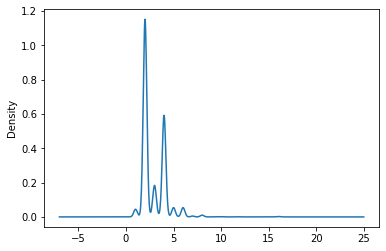

In [51]:
df['accommodates'].plot.density()

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_precio = df_precio.drop(['price'], axis=1) # quitamos el precio porque este array va a ser de entrada para poder estimar
# el precio del airbnb, por lo que no tiene sentido tener la salida entre las variables a analizar.

X = df_precio.values
scaler = MinMaxScaler()
scaler.fit(X)
scaled_n = scaler.transform(X) # scaler para la descripción de los pisos

priceArray = df['price'].values
scaler_y = MinMaxScaler()
scaler_y.fit(priceArray.reshape(-1,1))
price_scaled = scaler_y.transform(priceArray.reshape(-1,1)) # scaler para el array del precio


## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

__PRIMERA CAPA - UNA CAPA OCULTA DE 200 NEURONAS__

In [53]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, scaled_n, price_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.012678058326870708,
  -0.012226656573093376,
  -0.01227486731648672,
  -0.012250040777821141,
  -0.012243364484804887,
  -0.012228302978063623],
 [0.0003966419209094,
  0.0002739886670630562,
  0.00020223707355082813,
  0.00020722075014518768,
  0.0002049348239465796,
  0.00021794733926554078])

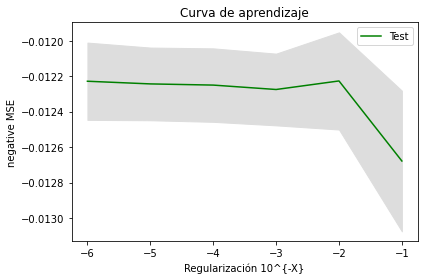

In [54]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

__SEGUNDA CAPA - DOS CAPAS OCULTAS DE 100 VARIABLES CADA__

In [55]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100, 100,), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, scaled_n, price_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.012723697054611205,
  -0.011979667476459645,
  -0.011740184971338063,
  -0.011704574246138705,
  -0.01169437301714911,
  -0.01175465244045318],
 [0.0003885895981672428,
  0.0003546605235645444,
  0.0004269019094578842,
  0.00044308683145133766,
  0.00043602684046625774,
  0.00045943793468267077])

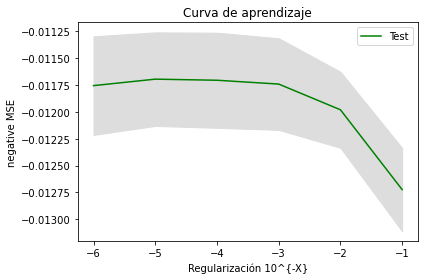

In [56]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

__¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?__

Ambas redes se asemejan la una a la otra. Los rangos de "negative MSE" para las dos redes son bastante parecidas, y por lo general parece que sus curvas de aprendizaje son estables hasta que empiezan a decrecer. Esto significa que la función de perdida está aumentando y ambas redes están sobreaprendiendo.

Sin embargo cabe notar que nuestra segunda red, con dos capas ocultas de 100 neuronas cada, está más cerca de 0 que la otra red: en sus puntos más altos, la primera red se situa alrededor de MSE = -0.0122 mientras que la segunda red está alrededor de MSE = -0.01175.

A pesar de estas leves diferencias, no podemos concluir que una de las dos redes domine a la otra. Al contrario, las dos se parecen. Al fin y al cabo, un MLP de una única capa oculta y suficientes neuronas puede resolver igual un problema que un MLP con más capas ocultas.

Las leves diferencias se pueden deber al número de capas: cuantas más capas tengamos, más capaz será nuestra red de modelar conceptos más abstractos, además es posible que la primera red de una capa oculta tenga demasiadas neuronas y esta sobreaprenda más rapido que la otra.


Analizando las redes, preferimos usar la red de dos capas y elegir como parámetro de regularización 10^-3 puesto que parece estar más cerca de 0 que los otros valores.

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [57]:
# array numpy de prices
prices = np.array(list(df['price']), dtype = int)

In [58]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.0001 # este valor equivale a 10^-3
mlp = MLPRegressor(hidden_layer_sizes=(200 ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, scaled_n, price_scaled.ravel(), cv=10)
# desescalamos las predicciones para que estén en la escala original
predicts_scaled = predicts_scaled.reshape(-1,1)
predicts=scaler_y.inverse_transform(predicts_scaled).ravel() # tenemos que poner .ravel() al final o si no nuestros datos saldrán
# individualmente dentro de tablas que a su vez están en otras tablas!

In [59]:
errors = np.abs(priceArray - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(prices)

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 31.70646719966534
Desviación típica: 33.09435409052874
Error medio en %: 24.38016190055344


__¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?__

El error medio del modelo es de 31.7 euros, con un error medio en porcentaje de 24%.
No podemos considerar este modelo eficiente, como vimos anteriormente la mayoria de los precios de los pisos están alrededor de 100 y 200. Una diferencia media de 31 euros es bastante notable para estos precios.

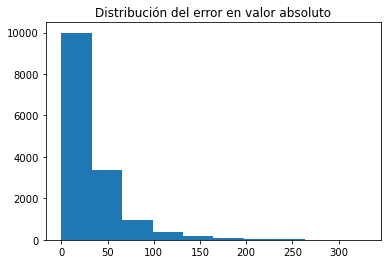

In [60]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

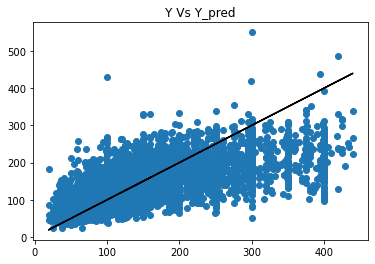

In [61]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(priceArray, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(priceArray, priceArray, color='k') 

plt.title('Y Vs Y_pred')
plt.show()

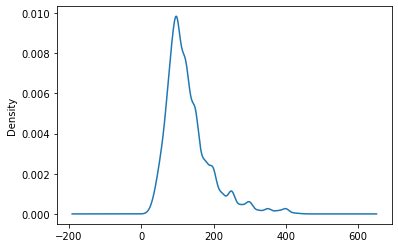

In [62]:
df['price'].plot.density()

__¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?__

Como podemos observar en la gráfica, nuestra red comete bastantes errores por todos lados. El modelo atribuye precios tanto demasiado altos como bajos a lo que realmente valen los pisos. La mayoria de errores que comete están en el rango de 0 a 25 euros, el cual para pisos de alrededor de 100 euros puede llegar a ser un error considerable.

Estos errores se amplifican incluso más al llegar a pisos con precios altos. Para estos pisos nuestro modelo predice sobretodo precios demasiado bajos y esto seguramente se debe a que no tenemos suficientes ejemplos de entrenamiento para pisos con precios más altos.

Como podemos observar en la gráfica de arriba además de los comentarios que hicimos cuando miramos la distribución de los precios, la mayoria de los precios están entre 90 y 150, algunos llegando hasta 200 y muy pocos a valores más altos como 400. Esto significa que cuando le damos a nuestro modelo un piso caro, como ha aprendido sobretodo con pisos de valores bajos, subestima los precios de estos.

